In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy.stats import norm 
from sklearn.preprocessing import StandardScaler 
from scipy import stats
%matplotlib inline

## 參考以下網站
[Kaggle House Price](https://chtseng.wordpress.com/2017/12/26/kaggle-house-price/)

In [38]:
train = pd.read_csv('train.csv')
y_train = train.SalePrice

In [39]:
train.shape

(1460, 81)

In [40]:
print('There are {} numerical variables.'.format(train.describe().shape[1]))
train.describe()

There are 38 numerical variables.


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [41]:
print('There are {} categorical variables.'.format(train.describe(include=['O']).shape[1]))
train.describe(include=['O']) 

There are 43 categorical variables.


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## 查看各欄位 missing value 的數量

In [42]:
null_count_df = pd.DataFrame(train.isnull().sum())
null_count_df.set_axis(['null_count'], axis=1, inplace=True)
null_index = null_count_df[null_count_df['null_count'] == 0].index
print(null_count_df.drop(null_index))

              null_count
LotFrontage          259
Alley               1369
MasVnrType             8
MasVnrArea             8
BsmtQual              37
BsmtCond              37
BsmtExposure          38
BsmtFinType1          37
BsmtFinType2          38
Electrical             1
FireplaceQu          690
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
GarageCond            81
PoolQC              1453
Fence               1179
MiscFeature         1406


## 查看各欄位 missing value 的比例

In [43]:
null_mean_df = pd.DataFrame(train.isnull().mean())
null_mean_df.set_axis(['null_mean'], axis=1, inplace=True)
null_index = null_mean_df[null_mean_df['null_mean'] == 0.].index
print(null_mean_df.drop(null_index).sort_values(by='null_mean', ascending=False))

              null_mean
PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
LotFrontage    0.177397
GarageType     0.055479
GarageYrBlt    0.055479
GarageFinish   0.055479
GarageQual     0.055479
GarageCond     0.055479
BsmtExposure   0.026027
BsmtFinType2   0.026027
BsmtFinType1   0.025342
BsmtCond       0.025342
BsmtQual       0.025342
MasVnrArea     0.005479
MasVnrType     0.005479
Electrical     0.000685


## 補缺值：將 FireplaceQu 缺值的內容補成 'None'

In [44]:
train['FireplaceQu'].fillna('None', inplace=True)

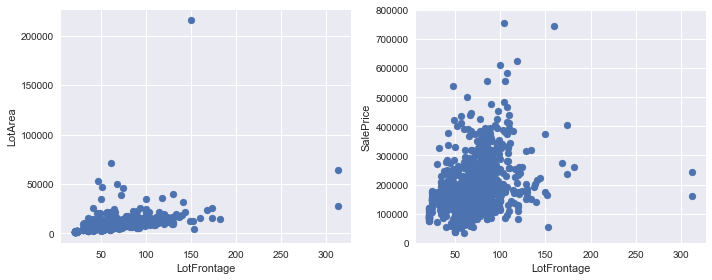

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(x=train['LotFrontage'], y=train['LotArea'])
ax[1].scatter(x=train['LotFrontage'], y=train['SalePrice'])
ax[0].set_xlabel('LotFrontage')
ax[0].set_ylabel('LotArea')
ax[1].set_xlabel('LotFrontage')
ax[1].set_ylabel('SalePrice')
ax[1].set_ylim(0, 800000)
plt.tight_layout()

## 補缺值：將 LotFrontage 缺值的內容補成 0

In [46]:
train['LotFrontage'].fillna(0, inplace=True)

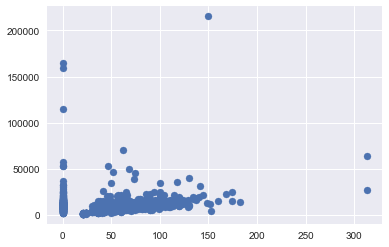

In [47]:
plt.scatter(x=train['LotFrontage'], y=train['LotArea']);

## 補缺值：將 LotFrontage 缺值的內容用「MasVnrType為BrkFace且Foundation為PConc」的樣本其 LotFrontage 的中位數去補

In [48]:
mask = (train['MasVnrArea'].isnull())
train.loc[mask, 'MasVnrArea'] = train[(train['MasVnrType'] == 'BrkFace') & (train['Foundation'] == 'PConc')][
    'MasVnrArea'].median()

## 補缺值：將 PoolQC 缺值的內容補成 'None'

In [49]:
train['PoolQC'].fillna('None', inplace=True)

## 補缺值：將 Fence 缺值的內容補成 'None'

In [50]:
train['Fence'].fillna('None', inplace=True)

## 查看各欄位 missing value 的數量

In [51]:
null_count_df = pd.DataFrame(train.isnull().sum())
null_count_df.set_axis(['null_count'], axis=1, inplace=True)
null_index = null_count_df[null_count_df['null_count'] == 0].index
print(null_count_df.drop(null_index))

              null_count
Alley               1369
MasVnrType             8
BsmtQual              37
BsmtCond              37
BsmtExposure          38
BsmtFinType1          37
BsmtFinType2          38
Electrical             1
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
GarageCond            81
MiscFeature         1406


## 查看各欄位 missing value 的比例

In [52]:
null_mean_df = pd.DataFrame(train.isnull().mean())
null_mean_df.set_axis(['null_mean'], axis=1, inplace=True)
null_index = null_mean_df[null_mean_df['null_mean'] == 0.].index
print(null_mean_df.drop(null_index).sort_values(by='null_mean', ascending=False))

              null_mean
MiscFeature    0.963014
Alley          0.937671
GarageType     0.055479
GarageYrBlt    0.055479
GarageFinish   0.055479
GarageQual     0.055479
GarageCond     0.055479
BsmtExposure   0.026027
BsmtFinType2   0.026027
BsmtQual       0.025342
BsmtCond       0.025342
BsmtFinType1   0.025342
MasVnrType     0.005479
Electrical     0.000685
